In [12]:
import numpy as np
import pymc3 as pm
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats

# https://towardsdatascience.com/a-b-testing-with-probabilistic-programming-and-pymc3-part-ii-10f0c16c8d1c

In [1]:
donors_A = 1300
donors_B = 1500

conversions_from_A = 273
conversions_from_B = 570

In [4]:
# group A
with pm.Model() as model_A:
    p_A = pm.Uniform('p_A', lower=0, upper=1)
    obs = pm.Binomial('obs', n=donors_A, p=p_A, observed=conversions_from_A)

    step = pm.Metropolis()

    trace_A = pm.sample(30_000, step=step)
    burned_trace_A = trace_A[1000:]

/home/arc/miniconda3/envs/pyalcs-experiments/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p_A]


Sampling 4 chains for 1_000 tune and 30_000 draw iterations (4_000 + 120_000 draws total) took 15 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [5]:
# group B
with pm.Model() as model_B:
    p_B = pm.Uniform('p_B', lower=0, upper=1)
    obs = pm.Binomial('obs', n=donors_B, p=p_B, observed=conversions_from_B)

    step = pm.Metropolis()

    trace_B = pm.sample(30_000, step=step)
    burned_trace_B = trace_B[1000:]

/home/arc/miniconda3/envs/pyalcs-experiments/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p_B]


Sampling 4 chains for 1_000 tune and 30_000 draw iterations (4_000 + 120_000 draws total) took 14 seconds.
The number of effective samples is smaller than 25% for some parameters.


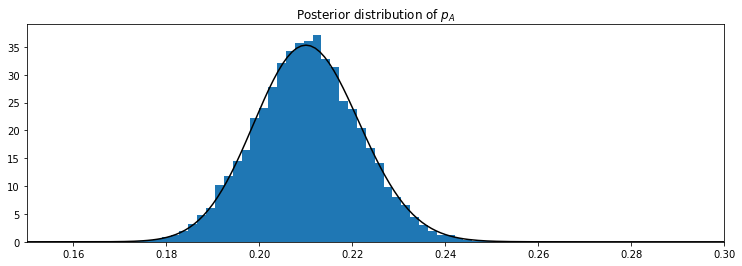

In [15]:
figsize(12.5, 4)

alpha_prior = beta_prior = 1

a = alpha_prior + conversions_from_A
b = beta_prior + donors_A - conversions_from_A

# coef = stats.beta(a, b)

plt.title(r'Posterior distribution of $p_A$')
plt.hist(burned_trace_A['p_A'], bins=50, histtype='stepfilled', density=True)

x = np.arange(0, 1.04, 0.001)
y = stats.beta.pdf(x, a , b)
plt.plot(x, y, color='black', label='True posterior distribution of $p_A$')

plt.xlim(0.15, 0.3)
plt.show()

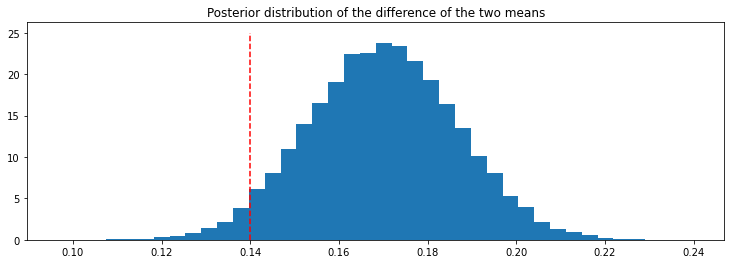

In [21]:
diff = burned_trace_B["p_B"] - burned_trace_A["p_A"]

figsize(12.5, 4)
plt.hist(diff, bins=40, density=True)
plt.vlines(0.14, 0, 25, linestyle='--', color='red')
plt.title('Posterior distribution of the difference of the two means')

plt.show()

In [23]:
# probability of 14% increase by group B
len(diff[diff>0.14]) * 1.0 / len(diff) * 100

96.57068965517242

In [24]:
# probability of 16% increase by group B
len(diff[diff>0.16]) * 1.0 / len(diff) * 100

72.22155172413794

## Continuous data